# API Crypto

In [ ]:
# headers is to add additional information
# session is to allows one to persist certain parameters across requests. 
# import json = because all the data is in json format

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6b4bc2aa-e5f9-4f7f-82dc-8385d9c9f419', #get the API key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-28T01:57:44.043Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
# The data is apply in JSON format, and the type is 'Dict'. 
# Import pandas to get 'DataFrame'

In [2]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max.columns', None)

In [14]:
# Write json_normalize to format data into readable data.
df = pd.json_normalize(data['data'])

# Show the timestamp when its running --> pd.to_datetime('now')
# Make new column for timestamp --> df['timestamp'] = ...

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961074e+07,1.961074e+07,False,NaN,1,NaN,NaN,None,2024-01-28T01:57:00.000Z,42105.962551,1.165381e+10,-54.8275,0.281133,0.705885,1.123225,-0.559413,10.862016,22.258281,8.257290e+11,50.7723,8.842252e+11,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,None,2024-01-28T01:57:00.000Z,2277.821487,5.147269e+09,-48.6604,0.482323,0.355281,-7.666191,-2.392902,10.956688,27.026872,2.737493e+11,16.8323,2.737493e+11,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
2,825,Tether USDt,USDT,tether,73214,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.999934,2.319622e+10,-45.6780,-0.011408,-0.011674,0.055215,-0.123275,-0.059389,-0.048691,9.603046e+10,5.9069,9.859431e+10,None,2024-01-28T01:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 09:30:53.240522
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495476e+08,1.495476e+08,False,NaN,4,NaN,NaN,None,2024-01-28T01:56:00.000Z,305.774733,6.945162e+08,-27.6542,0.290228,0.852694,-3.403334,-3.795993,32.841137,34.424681,4.572788e+10,2.8128,4.572788e+10,None,2024-01-28T01:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.333827e+08,5.682258e+08,True,NaN,5,NaN,NaN,None,2024-01-28T01:57:00.000Z,94.243567,1.236119e+09,-40.5226,0.580647,1.933038,2.343965,-8.581276,60.994740,186.690556,4.084353e+10,2.5114,5.355163e+10,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,None,2024-01-28T01:57:00.000Z,0.531239,4.589420e+08,-54.3386,0.271042,0.081995,-3.755938,-15.375561,-13.162083,-4.369447,2.888585e+10,1.7761,5.312388e+10,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
6,3408,USDC,USDC,usd-coin,16420,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.611312e+10,2.611312e+10,False,NaN,7,NaN,NaN,None,2024-01-28T01:57:00.000Z,1.000121,2.934567e+09,-46.9620,-0.011166,-0.005555,-0.001000,-0.014254,0.016461,0.012911,2.611627e+10,1.6064,2.611627e+10,None,2024-01-28T01:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 09:30:53.240522
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541427e+10,3.657136e+10,False,NaN,8,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.491316,2.425265e+08,-33.8366,0.864915,1.176785,-4.308158,-18.601410,27.186375,66.267825,1.739961e+10,1.0703,2.210924e+10,None,2024-01-28T01:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

## Run data every 1 minutes

In [25]:
def API_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '6b4bc2aa-e5f9-4f7f-82dc-8385d9c9f419',
    }
    
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])
            
            
    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [27]:
import os
from time import time #tracking the time/date
from time import sleep #pause

for i in range(333):
    API_runner()
    print('API running successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-01-28T02:50:26.841Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-01-28T02:51:28.064Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-01-28T02:52:29.399Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-01-28T02:53:30.427Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-01-28T02:54:31.695Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8798}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [29]:
pd.set_option('display.max.rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961074e+07,1.961074e+07,False,NaN,1,NaN,NaN,None,2024-01-28T01:57:00.000Z,42105.962551,1.165381e+10,-54.8275,0.281133,0.705885,1.123225,-0.559413,10.862016,22.258281,8.257290e+11,50.7723,8.842252e+11,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,None,2024-01-28T01:57:00.000Z,2277.821487,5.147269e+09,-48.6604,0.482323,0.355281,-7.666191,-2.392902,10.956688,27.026872,2.737493e+11,16.8323,2.737493e+11,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
2,825,Tether USDt,USDT,tether,73214,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.999934,2.319622e+10,-45.6780,-0.011408,-0.011674,0.055215,-0.123275,-0.059389,-0.048691,9.603046e+10,5.9069,9.859431e+10,None,2024-01-28T01:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 09:30:53.240522
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495476e+08,1.495476e+08,False,NaN,4,NaN,NaN,None,2024-01-28T01:56:00.000Z,305.774733,6.945162e+08,-27.6542,0.290228,0.852694,-3.403334,-3.795993,32.841137,34.424681,4.572788e+10,2.8128,4.572788e+10,None,2024-01-28T01:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.333827e+08,5.682258e+08,True,NaN,5,NaN,NaN,None,2024-01-28T01:57:00.000Z,94.243567,1.236119e+09,-40.5226,0.580647,1.933038,2.343965,-8.581276,60.994740,186.690556,4.084353e+10,2.5114,5.355163e+10,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,None,2024-01-28T01:57:00.000Z,0.531239,4.589420e+08,-54.3386,0.271042,0.081995,-3.755938,-15.375561,-13.162083,-4.369447,2.888585e+10,1.7761,5.312388e+10,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
6,3408,USDC,USDC,usd-coin,16420,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.611312e+10,2.611312e+10,False,NaN,7,NaN,NaN,None,2024-01-28T01:57:00.000Z,1.000121,2.934567e+09,-46.9620,-0.011166,-0.005555,-0.001000,-0.014254,0.016461,0.012911,2.611627e+10,1.6064,2.611627e+10,None,2024-01-28T01:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 09:30:53.240522
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541427e+10,3.657136e+10,False,NaN,8,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.491316,2.425265e+08,-33.8366,0.864915,1.176785,-4.308158,-18.601410,27.186375,66.267825,1.739961e+10,1.0703,2.210924e+10,None,2024-01-28T01:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

## change format example in max_supply column

In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#'.5f' --> decimal round

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19610737.00000,19610737.00000,False,NaN,1,NaN,NaN,None,2024-01-28T01:57:00.000Z,42105.96255,11653811061.04559,-54.82750,0.28113,0.70589,1.12322,-0.55941,10.86202,22.25828,825728957725.02075,50.77230,884225213576.90002,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180302.95516,120180302.95516,True,NaN,2,NaN,NaN,None,2024-01-28T01:57:00.000Z,2277.82149,5147268525.80629,-48.66040,0.48232,0.35528,-7.66619,-2.39290,10.95669,27.02687,273749276392.26526,16.83230,273749276392.26999,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
2,825,Tether USDt,USDT,tether,73214,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96036749591.53659,98600769239.51694,True,NaN,3,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.99993,23196217689.99303,-45.67800,-0.01141,-0.01167,0.05521,-0.12328,-0.05939,-0.04869,96030457973.37584,5.90690,98594309645.74001,None,2024-01-28T01:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-28 09:30:53.240522
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149547612.33345,149547612.33345,False,NaN,4,NaN,NaN,None,2024-01-28T01:56:00.000Z,305.77473,694516150.70787,-27.65420,0.29023,0.85269,-3.40333,-3.79599,32.84114,34.42468,45727881231.59493,2.81280,45727881231.59000,None,2024-01-28T01:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,433382721.35786,568225801.72345,True,NaN,5,NaN,NaN,None,2024-01-28T01:57:00.000Z,94.24357,1236119498.13375,-40.52260,0.58065,1.93304,2.34397,-8.58128,60.99474,186.69056,40843533505.85300,2.51140,53551626375.10000,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54374512255.00000,99987956150.00000,False,NaN,6,NaN,NaN,None,2024-01-28T01:57:00.000Z,0.53124,458941986.19359,-54.33860,0.27104,0.08199,-3.75594,-15.37556,-13.16208,-4.36945,28885853118.36131,1.77610,53123884556.23000,None,2024-01-28T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-28 09:30:53.240522
6,3408,USDC,USDC,usd-coin,16420,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26113123393.27255,26113123393.27255,False,NaN,7,NaN,NaN,None,2024-01-28T01:57:00.000Z,1.00012,2934567416.02248,-46.96200,-0.01117,-0.00556,-0.00100,-0.01425,0.01646,0.01291,26116271696.37482,1.60640,26116271696.37000,None,2024-01-28T01:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-28 09:30:53.240522
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35414268185.21400,36571363488.23100,False,NaN,8,NaN,NaN,None,2024-01-28T01:56:00.000Z,0.49132,242526496.49399,-33.83660,0.86492,1.17678,-4.30816,-18.60141,27.18637,66.26783,17399614217.80839,1.07030,22109242402.14000,None,2024-01-28T01:56:00.00

## do groupby 'name' and just include some columns

In [48]:
df3= df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
  'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
  'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Avalanche,0.17475,4.39139,3.85524,-15.30289,63.96879,201.86043
BNB,-0.18339,0.40593,-3.96708,-4.31161,32.83878,34.72635
Bitcoin,0.06615,0.65302,1.07886,-1.04017,11.10893,22.63194
Cardano,0.16230,0.75697,-4.65601,-19.62349,27.50269,66.67551
Chainlink,0.18088,0.61132,-8.24194,-8.91812,-1.59393,28.75987
Dogecoin,-0.00424,0.22865,-10.62985,-12.24390,-0.57818,16.57656
Ethereum,0.16636,0.25219,-7.82081,-2.57409,11.17070,27.63707
Polkadot,-0.17342,-0.33990,-3.28707,-19.36349,26.28226,55.47065
Polygon,0.42351,3.97785,0.43270,-19.08591,5.38201,24.85894


## stack is to change format just like down below:

In [49]:
df4 = df3.stack()

In [50]:
df4

name                                     
Avalanche    quote.USD.percent_change_1h      0.17475
             quote.USD.percent_change_24h     4.39139
             quote.USD.percent_change_7d      3.85524
             quote.USD.percent_change_30d   -15.30289
             quote.USD.percent_change_60d    63.96879
             quote.USD.percent_change_90d   201.86043
BNB          quote.USD.percent_change_1h     -0.18339
             quote.USD.percent_change_24h     0.40593
             quote.USD.percent_change_7d     -3.96708
             quote.USD.percent_change_30d    -4.31161
             quote.USD.percent_change_60d    32.83878
             quote.USD.percent_change_90d    34.72635
Bitcoin      quote.USD.percent_change_1h      0.06615
             quote.USD.percent_change_24h     0.65302
             quote.USD.percent_change_7d      1.07886
             quote.USD.percent_change_30d    -1.04017
             quote.USD.percent_change_60d    11.10893
             quote.USD.percent_change_90

## make the stack above into data frame

In [55]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Avalanche   quote.USD.percent_change_1h    0.17475
            quote.USD.percent_change_24h   4.39139
            quote.USD.percent_change_7d    3.85524
            quote.USD.percent_change_30d -15.30289
            quote.USD.percent_change_60d  63.96879
            quote.USD.percent_change_90d 201.86043
BNB         quote.USD.percent_change_1h   -0.18339
            quote.USD.percent_change_24h   0.40593
            quote.USD.percent_change_7d   -3.96708
            quote.USD.percent_change_30d  -4.31161
            quote.USD.percent_change_60d  32.83878
            quote.USD.percent_change_90d  34.72635
Bitcoin     quote.USD.percent_change_1h    0.06615
            quote.USD.percent_change_24h   0.65302
            quote.USD.percent_change_7d    1.07886
            quote.USD.percent_change_30d  -1.04017
            quote.USD.percent_change_60d  11.10893
            quote.USD.percent_change_90d  22.63194
Cardano     quote.USD.percent_change_1h    0.16230
            quote.USD.percent_change_24h   0.75697
            quote.USD.percent_change_7d   -4.65601
            quote.USD.percent_change_30d -19.62349
            quote.USD.percent_change_60d  27.50269
            quote.USD.percent_change_90d  66.67551
Chainlink   quote.USD.percent_change_1h    0.18088
            quote.USD.percent_change_24h   0.61132
            quote.USD.percent_change_7d   -8.24194
            quote.USD.percent_change_30d  -8.91812
            quote.USD.percent_change_60d  -1.59393
            quote.USD.percent_change_90d  28.75987
Dogecoin    quote.USD.percent_change_1h   -0.00424
            quote.USD.percent_change_24h   0.22865
            quote.USD.percent_change_7d  -10.62985
            quote.USD.percent_change_30d -12.24390
            quote.USD.percent_change_60d  -0.57818
            quote.USD.percent_change_90d  16.57656
Ethereum    quote.USD.percent_change_1h    0.16636
            quote.USD.percent_change_24h   0.25219
            quote.USD.percent_change_7d   -7.82081
            quote.USD.percent_change_30d  -2.57409
            quote.USD.percent_change_60d  11.17070
            quote.USD.percent_change_90d  27.63707
Polkadot    quote.USD.percent_change_1h   -0.17342
            quote.USD.percent_change_24h  -0.33990
            quote.USD.percent_change_7d   -3.28707
            quote.USD.percent_change_30d -19.36349
            quote.USD.percent_change_60d  26.28226
            quote.USD.percent_change_90d  55.47065
Polygon     quote.USD.percent_change_1h    0.42351
            quote.USD.percent_change_24h   3.97785
            quote.USD.percent_change_7d    0.43270
            quote.USD.percent_change_30d -19.08591
            quote.USD.percent_change_60d   5.38201
            quote.USD.percent_change_90d  24.85894
Solana      quote.USD.percent_change_1h    0.13195
            quote.USD.percent_change_24h   1.13432
            quote.USD.percent_change_7d    1.91123
            quote.USD.percent_change_30d  -9.48960
            quote.USD.percent_change_60d  61.30484
            quote.USD.percent_change_90d 185.58251
TRON        quote.USD.percent_change_1h    0.39131
            quote.USD.percent_change_24h  -2.30697
            quote.USD.percent_change_7d    1.93709
            quote.USD.percent_change_30d   7.21814
            quote.USD.percent_change_60d   9.36562
            quote.USD.percent_change_90d  19.42297
Tether USDt quote.USD.percent_change_1h    0.01055
            quote.USD.percent_change_24h   0.00314
            quote.USD.percent_change_7d    0.07356
            quote.USD.percent_change_30d  -0.05788
            quote.USD.percent_change_60d  -0.03293
            quote.USD.percent_change_90d  -0.02968
Toncoin     quote.USD.percent_change_1h   -0.02629
            quote.USD.percent_change_24h   1.04518
            quote.USD.percent_change_7d   -8.23878
            quote.USD.percent_change_30d  -5.06573
            quote.USD.percent_change_60d -13.55131
            quo

## To insert index

In [56]:
#to know how much row in the data

df5.count()

values    90
dtype: int64

In [63]:
#Setting index using --> df6 = df5.set_index(index

index = pd.Index(range(90))

#df6 = df5.set_index(index)

#reset index to make it works
df6 = df5.reset_index()
df6

,name,level_1,values
0,Avalanche,quote.USD.percent_change_1h,0.17475
1,Avalanche,quote.USD.percent_change_24h,4.39139
2,Avalanche,quote.USD.percent_change_7d,3.85524
3,Avalanche,quote.USD.percent_change_30d,-15.30289
4,Avalanche,quote.USD.percent_change_60d,63.96879
5,Avalanche,quote.USD.percent_change_90d,201.86043
6,BNB,quote.USD.percent_change_1h,-0.18339
7,BNB,quote.USD.percent_change_24h,0.40593
8,BNB,quote.USD.percent_change_7d,-3.96708
9,BNB,quote.USD.percent_change_30d,-4.31161


In [68]:
#Rename the column
df7 = df6.rename(columns={'level_1': 'percent_change'})

#replace the values name to visualization purpose
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                        ['1h','24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Avalanche,1h,0.17475
1,Avalanche,24h,4.39139
2,Avalanche,7d,3.85524
3,Avalanche,30d,-15.30289
4,Avalanche,60d,63.96879
5,Avalanche,90d,201.86043
6,BNB,1h,-0.18339
7,BNB,24h,0.40593
8,BNB,7d,-3.96708
9,BNB,30d,-4.31161


## Visualization using seaborn and matplotlib

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


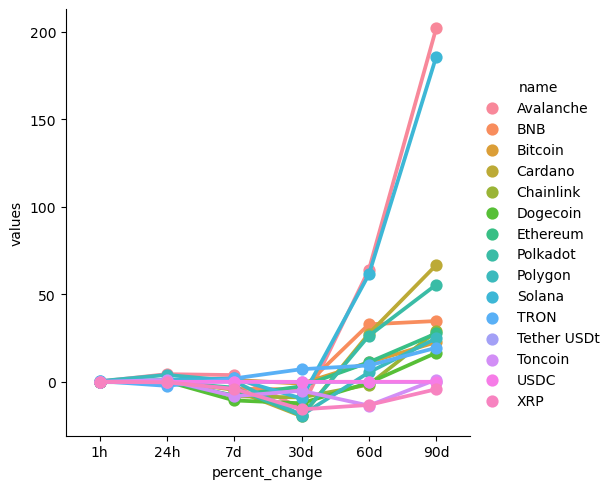

In [69]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

## to do something much simpler, we create a dataframe with the columns we want

In [71]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Avalanche'")
df10

,name,quote.USD.price,timestamp
8,Avalanche,34.27123,2024-01-28 09:30:53.240522
8,Avalanche,34.02044,2024-01-28 09:50:26.979218
8,Avalanche,34.02044,2024-01-28 09:51:28.214648
8,Avalanche,34.04067,2024-01-28 09:52:29.551767
8,Avalanche,34.08768,2024-01-28 09:53:30.583331
8,Avalanche,34.09966,2024-01-28 09:54:31.847811


## and visualization it!

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

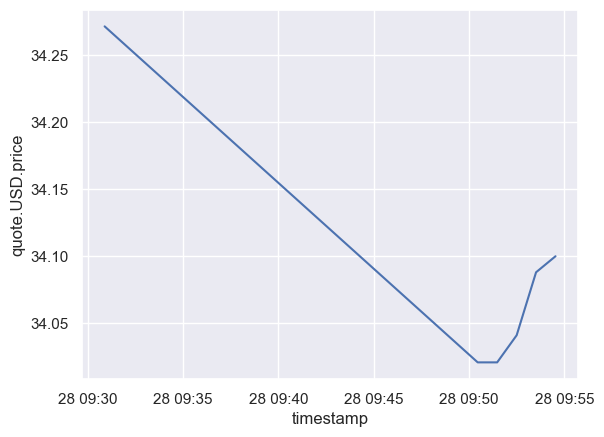

In [72]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)